In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')

print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [30]:
df.shape

(545, 13)

In [31]:
object_cols = df.select_dtypes(include = ['object']).columns
print("Categorical variables:",len(object_cols))

int_cols = df.select_dtypes(include = ['int64']).columns
print("Integer variables:",len(int_cols))

float_cols = df.select_dtypes(include = ['float64']).columns
print("Float variables:",len(float_cols))

Categorical variables: 7
Integer variables: 6
Float variables: 0


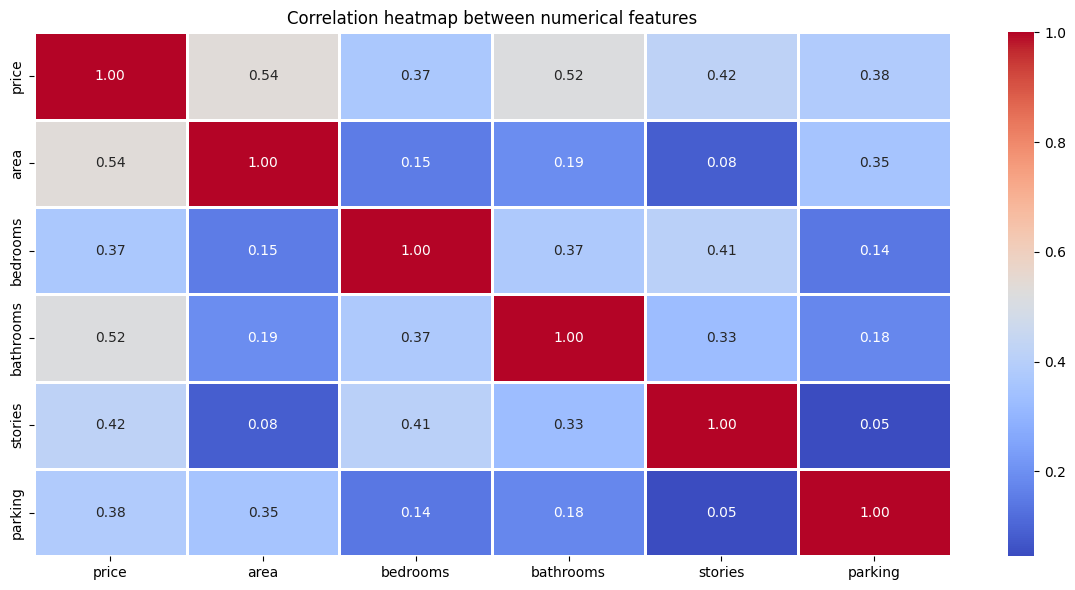

In [32]:
num_ds = df.select_dtypes(include =['int64'])
plt.figure(figsize =(12,6))
sns.heatmap(num_ds.corr(),
            cmap = 'coolwarm',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.title("Correlation heatmap between numerical features")
plt.tight_layout()
plt.savefig('Correlation_heatmap.png')


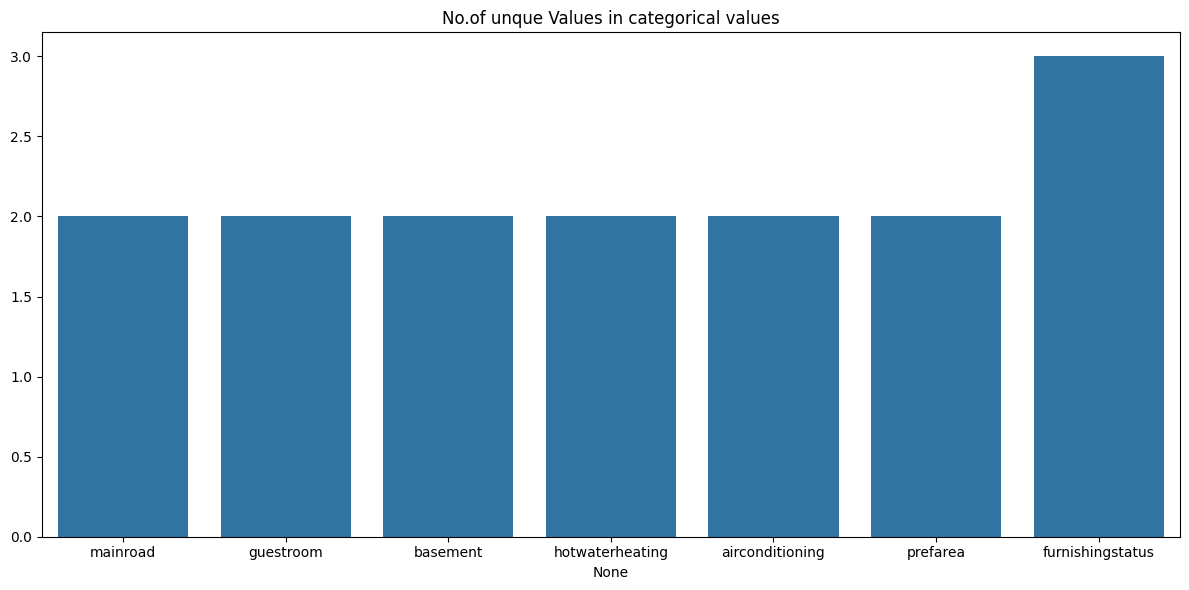

In [33]:
unique_values = []

for col in object_cols:
    unique_values.append(df[col].nunique())
plt.figure(figsize=(12,6))
plt.title("No.of unque Values in categorical values")
# plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)
plt.tight_layout()
plt.show()

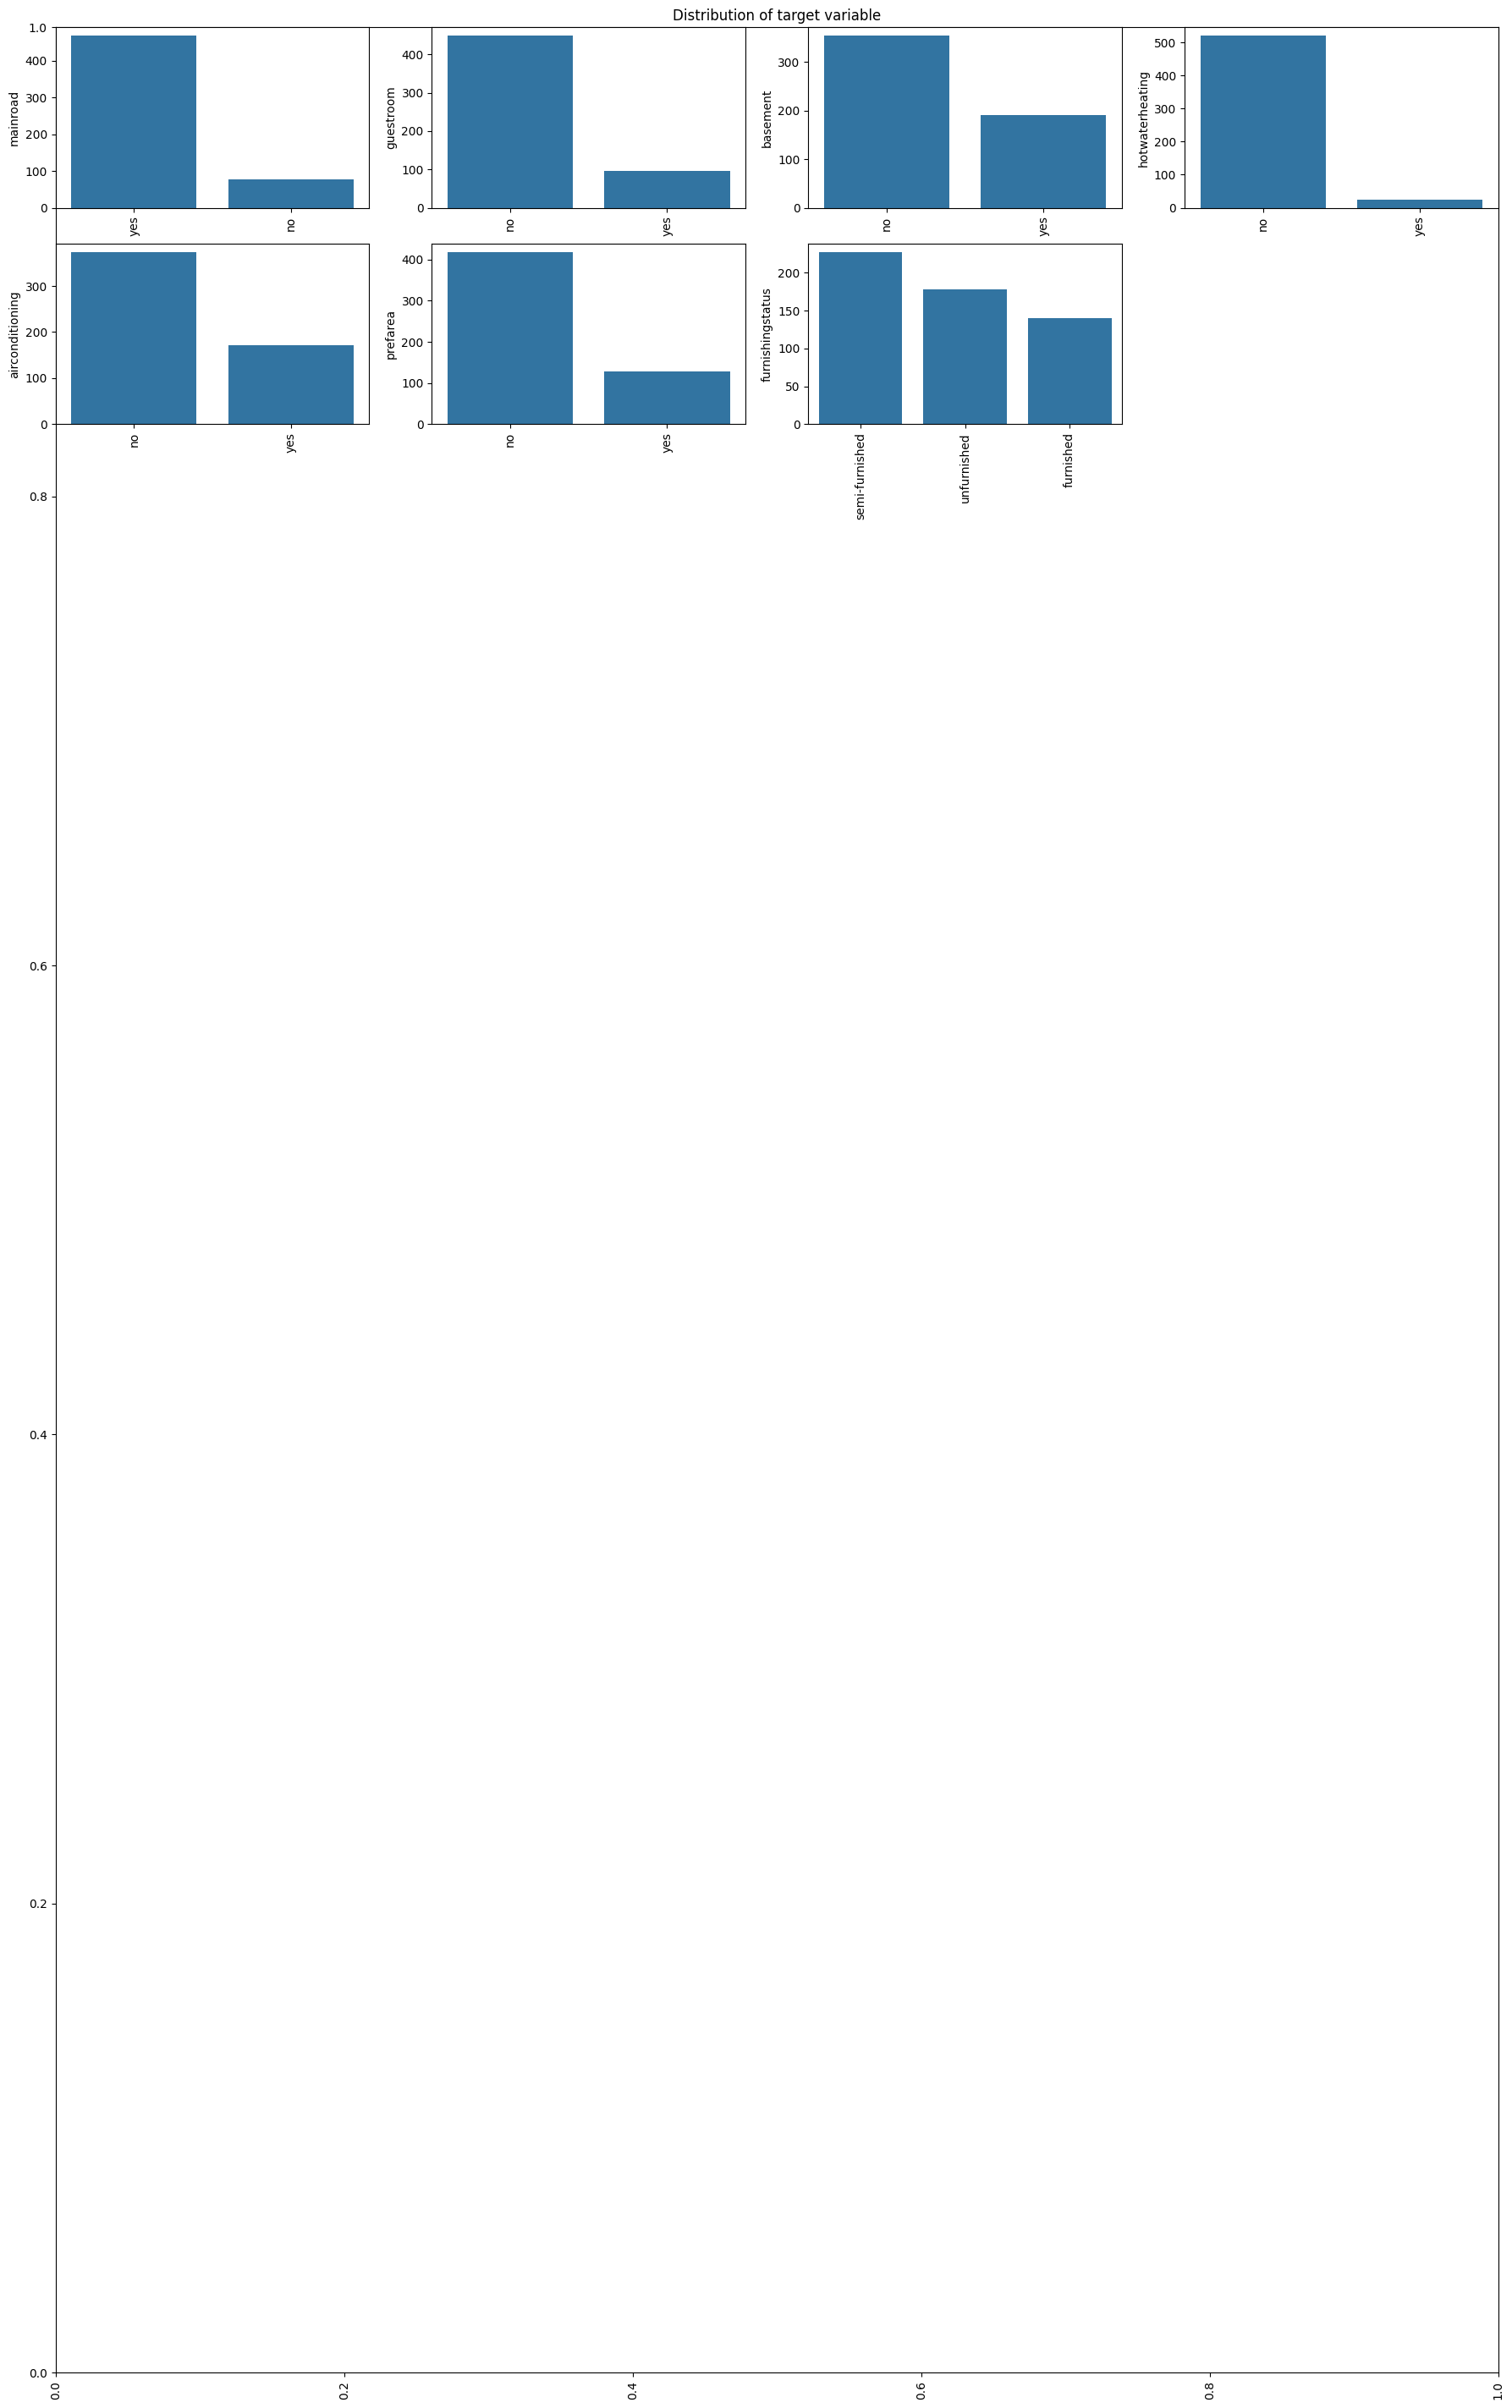

In [34]:
plt.figure(figsize=(22,36))
plt.title("Distribution of target variable")
plt.xticks(rotation=90)
index=1

for col in object_cols:
    y=df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    plt.ylabel(col)
    sns.barplot(x=list(y.index),y=(y.values))
    index+=1

In [35]:
df['price'] = df['price'].fillna(df['price'].mean())
new_df = df.dropna()
print(new_df.isnull().sum() )

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [36]:
from sklearn.preprocessing import OneHotEncoder

s= (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print(f"Categorical variables: {(object_cols)} \n No.of Categorical Variables: {len(object_cols)}")


Categorical variables: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] 
 No.of Categorical Variables: 7


In [37]:
OH_encoder = OneHotEncoder(sparse_output= False, handle_unknown ='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis = 1)
df_final = pd.concat([df_final, OH_cols], axis = 1)
print(df_final.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2          0.0   
1  12250000  8960         4          4        4        3          0.0   
2  12250000  9960         3          2        2        2          0.0   
3  12215000  7500         4          2        2        3          0.0   
4  11410000  7420         4          1        2        2          0.0   

   mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0           1.0           1.0            0.0  ...           0.0   
1           1.0           1.0            0.0  ...           0.0   
2           1.0           1.0            0.0  ...           1.0   
3           1.0           1.0            0.0  ...           1.0   
4           1.0           0.0            1.0  ...           1.0   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                 1.0                  0.0                 0.0   
1                 1.0     

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

x=df_final.drop('price', axis = 1)
y=df_final['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size =0.2,random_state=0)


In [48]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

model_SVR =svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred= model_SVR.predict(x_test)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,y_pred))


Mean Absolute Percentage Error: 0.2710074432862681
